## 1- Data Exploration and Visualization

In [208]:
## import libraries

import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [209]:
## Load train Dataset
house_train=pd.read_csv('train.csv')
house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [210]:
## Load test Dataset
house_test=pd.read_csv('test.csv')
house_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [211]:
house_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [212]:
house_train.shape

(1460, 81)

In [213]:
house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Working on train data

In [214]:
# Display columns with NaN

missing = house_train.isnull().sum()
# Filter out columns with null values only
null_columns = missing[missing > 0]

print(null_columns)


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


## 2- Data preprocessing

### 1-Handling missing values

In [215]:
## drop columns with large NaN (Alley,Fence,PoolQC,MiscFeature)
house_train.drop(['Alley','Fence','PoolQC','MiscFeature','Condition2','Functional'],axis=1,inplace=True)
house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [216]:
house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [217]:
# Display columns with NaN

missing = house_train.isnull().sum()
# Filter out columns with null values only
null_columns = missing[missing > 0]

print(null_columns)


LotFrontage     259
MasVnrType      872
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64


In [218]:
# Impute categorical columns with mode
categorical_columns = [
    'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
    'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond'
]
for column in categorical_columns:
    house_train[column].fillna(house_train[column].mode()[0], inplace=True)


In [219]:
house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

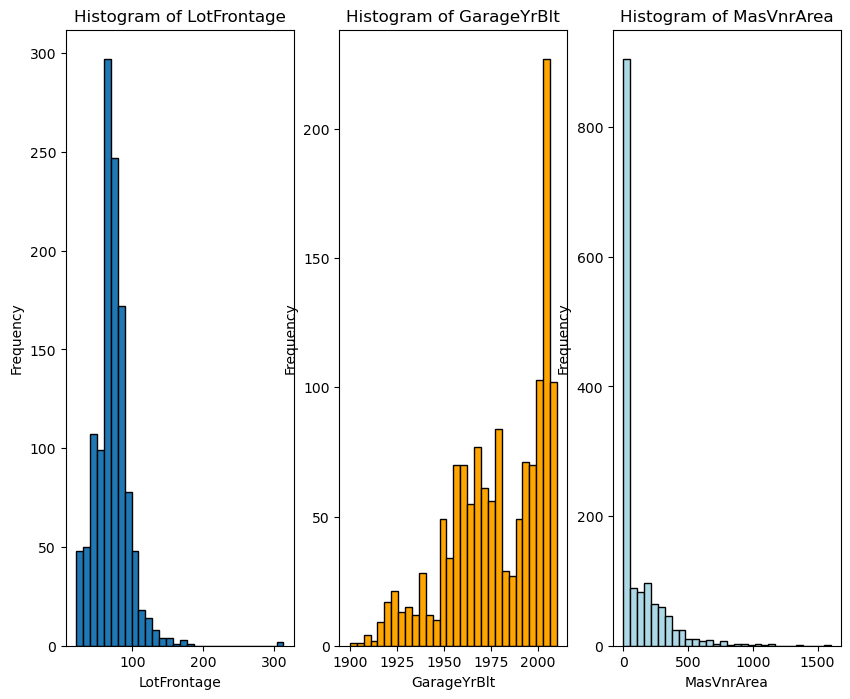

In [220]:
# Example column names
column_names = ['LotFrontage', 'GarageYrBlt','MasVnrArea']

# Create subplots to display two histograms side by side
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 8))  # Adjust the figsize as needed

# Plot the histogram for the first column
house_train[column_names[0]].plot(kind='hist', bins=30, edgecolor='black', ax=axes[0])
axes[0].set_title(f'Histogram of {column_names[0]}')
axes[0].set_xlabel(column_names[0])
axes[0].set_ylabel('Frequency')

# Plot the histogram for the second column
house_train[column_names[1]].plot(kind='hist', bins=30, edgecolor='black',color='orange', ax=axes[1])
axes[1].set_title(f'Histogram of {column_names[1]}')
axes[1].set_xlabel(column_names[1])
axes[1].set_ylabel('Frequency')

house_train[column_names[2]].plot(kind='hist', bins=30, edgecolor='black',color='lightblue', ax=axes[2])
axes[2].set_title(f'Histogram of {column_names[2]}')
axes[2].set_xlabel(column_names[2])
axes[2].set_ylabel('Frequency')

# Display the plots
plt.show()

## There is skewness so i will fill the NaNs with median 

In [221]:
house_train['LotFrontage'].fillna(house_train['LotFrontage'].median(),inplace=True)
house_train['GarageYrBlt'].fillna(house_train['GarageYrBlt'].median(),inplace=True)
house_train['MasVnrArea'].fillna(house_train['MasVnrArea'].median(),inplace=True)


In [222]:
house_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

## Working on test data

In [223]:
house_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [224]:
## drop columns in test with large NaN (Alley,Fence,PoolQC,MiscFeature)
house_test.drop(['Alley','Fence','PoolQC','MiscFeature','Condition2','Functional'],axis=1,inplace=True)

In [225]:
# Display columns with NaN

Test_missing = house_test.isnull().sum()
# Filter out columns with null values only
test_null_columns = Test_missing[Test_missing > 0]

print(test_null_columns)


MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrType      894
MasVnrArea       15
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinSF1        1
BsmtFinType2     42
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
FireplaceQu     730
GarageType       76
GarageYrBlt      78
GarageFinish     78
GarageCars        1
GarageArea        1
GarageQual       78
GarageCond       78
SaleType          1
dtype: int64


In [226]:
# Impute categorical columns with mode
categorical_columns = [
    'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
    'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond','SaleType'
]
for column in categorical_columns:
    house_test[column].fillna(house_test[column].mode()[0], inplace=True)



In [227]:
house_test['LotFrontage'].fillna(house_train['LotFrontage'].median(),inplace=True)
house_test['GarageYrBlt'].fillna(house_train['GarageYrBlt'].median(),inplace=True)

In [228]:
house_test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 74, dtype: int64

### 2- check imbalanced data

In [229]:
## Check for imbalanced for the target column

##sns.histplot(house_train['SalePrice'], kde=True,color='lightpink')
##plt.title('Distribution of SalePrice')
##plt.show()

In [230]:
## Calculate skewness

##from scipy.stats import skew

##skewness = skew(house_train['SalePrice'])
##print(f'Skewness of SalePrice: {skewness}')

In [231]:
## Apply log tranformation

##house_train['SalePrice'] = np.log1p(house_train['SalePrice'])

In [232]:
## Skewness after log 

##skewness_after = skew(house_train['SalePrice'])
3#print(f'Skewness of SalePrice: {skewness_after}')

3

In [233]:
##sns.histplot(house_train['SalePrice'], kde=True,color='lightgreen')
##plt.title('Distribution of SalePrice after Normalization')
##plt.show()

## 3- Check outliers

In [234]:
from scipy import stats

numerical_columns = house_train.select_dtypes(include=[np.number]).columns
house_train=house_train[(np.abs(stats.zscore(house_train[numerical_columns])) < 3).all(axis=1)] # axis= 1 row

In [235]:
house_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
10,11,20,RL,70.0,11200,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,129500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1453,180,RM,35.0,3675,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000


In [236]:
house_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1015 entries, 0 to 1456
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1015 non-null   int64  
 1   MSSubClass     1015 non-null   int64  
 2   MSZoning       1015 non-null   object 
 3   LotFrontage    1015 non-null   float64
 4   LotArea        1015 non-null   int64  
 5   Street         1015 non-null   object 
 6   LotShape       1015 non-null   object 
 7   LandContour    1015 non-null   object 
 8   Utilities      1015 non-null   object 
 9   LotConfig      1015 non-null   object 
 10  LandSlope      1015 non-null   object 
 11  Neighborhood   1015 non-null   object 
 12  Condition1     1015 non-null   object 
 13  BldgType       1015 non-null   object 
 14  HouseStyle     1015 non-null   object 
 15  OverallQual    1015 non-null   int64  
 16  OverallCond    1015 non-null   int64  
 17  YearBuilt      1015 non-null   int64  
 18  YearRemodAdd 

<Axes: xlabel='MSSubClass'>

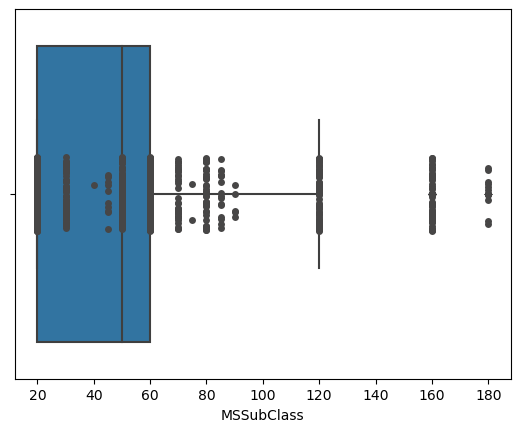

In [237]:
sns.boxplot(x='MSSubClass', data=house_train)
sns.stripplot(x='MSSubClass', data=house_train, color="#474646")

<Axes: xlabel='MSSubClass'>

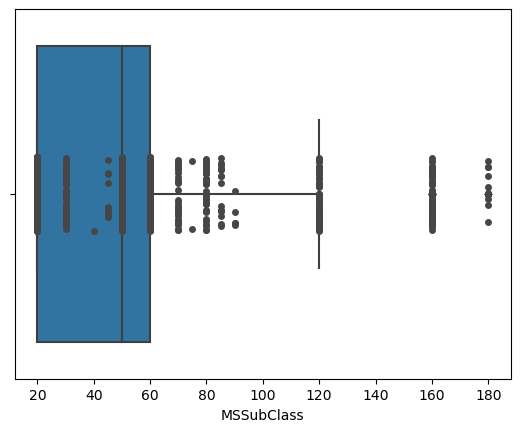

In [238]:
sns.boxplot(x='MSSubClass', data=house_train)
sns.stripplot(x='MSSubClass', data=house_train, color="#474646")

<Axes: xlabel='LotFrontage'>

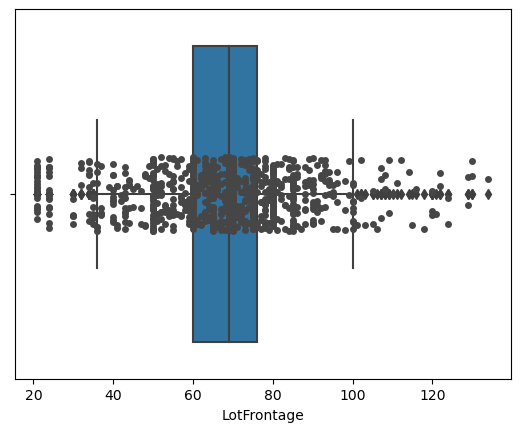

In [239]:
sns.boxplot(x='LotFrontage', data=house_train)
sns.stripplot(x='LotFrontage', data=house_train, color="#474646")

In [240]:
house_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1015 entries, 0 to 1456
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1015 non-null   int64  
 1   MSSubClass     1015 non-null   int64  
 2   MSZoning       1015 non-null   object 
 3   LotFrontage    1015 non-null   float64
 4   LotArea        1015 non-null   int64  
 5   Street         1015 non-null   object 
 6   LotShape       1015 non-null   object 
 7   LandContour    1015 non-null   object 
 8   Utilities      1015 non-null   object 
 9   LotConfig      1015 non-null   object 
 10  LandSlope      1015 non-null   object 
 11  Neighborhood   1015 non-null   object 
 12  Condition1     1015 non-null   object 
 13  BldgType       1015 non-null   object 
 14  HouseStyle     1015 non-null   object 
 15  OverallQual    1015 non-null   int64  
 16  OverallCond    1015 non-null   int64  
 17  YearBuilt      1015 non-null   int64  
 18  YearRemodAdd 

In [241]:
# get a list of quantative columns
quantitative = [f for f in house_train.columns if house_train.dtypes[f] != 'object']
quantitative

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [242]:
# get a list of qulitative features
qualitative = [f for f in  house_train.columns if  house_train.dtypes[f] == 'object']
qualitative

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [243]:
quantitative_data = house_train[quantitative]
corr_matrix = quantitative_data.corr()
label= corr_matrix["SalePrice"]
label.sort_values(ascending=False) # correlation between input features and output y


SalePrice        1.000000
OverallQual      0.813903
GrLivArea        0.757007
GarageCars       0.697028
GarageArea       0.670352
FullBath         0.669794
YearBuilt        0.632075
TotalBsmtSF      0.627239
TotRmsAbvGrd     0.594391
1stFlrSF         0.593348
YearRemodAdd     0.566916
GarageYrBlt      0.553380
Fireplaces       0.436872
MasVnrArea       0.415562
OpenPorchSF      0.391954
LotFrontage      0.387509
LotArea          0.364850
BsmtFinSF1       0.350999
WoodDeckSF       0.330729
2ndFlrSF         0.318098
BedroomAbvGr     0.276780
HalfBath         0.268377
BsmtFullBath     0.231293
BsmtUnfSF        0.219351
MoSold           0.088510
ScreenPorch      0.017633
3SsnPorch       -0.001348
LowQualFinSF    -0.020850
Id              -0.024314
YrSold          -0.026457
MSSubClass      -0.037097
MiscVal         -0.070746
BsmtFinSF2      -0.098253
OverallCond     -0.158932
EnclosedPorch   -0.205026
BsmtHalfBath          NaN
KitchenAbvGr          NaN
PoolArea              NaN
Name: SalePr

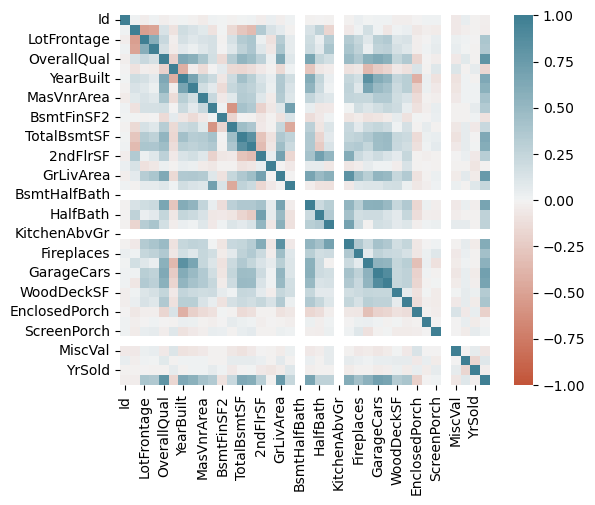

In [244]:
x = sns.heatmap(
    corr_matrix,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [245]:
house_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1015 entries, 0 to 1456
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1015 non-null   int64  
 1   MSSubClass     1015 non-null   int64  
 2   MSZoning       1015 non-null   object 
 3   LotFrontage    1015 non-null   float64
 4   LotArea        1015 non-null   int64  
 5   Street         1015 non-null   object 
 6   LotShape       1015 non-null   object 
 7   LandContour    1015 non-null   object 
 8   Utilities      1015 non-null   object 
 9   LotConfig      1015 non-null   object 
 10  LandSlope      1015 non-null   object 
 11  Neighborhood   1015 non-null   object 
 12  Condition1     1015 non-null   object 
 13  BldgType       1015 non-null   object 
 14  HouseStyle     1015 non-null   object 
 15  OverallQual    1015 non-null   int64  
 16  OverallCond    1015 non-null   int64  
 17  YearBuilt      1015 non-null   int64  
 18  YearRemodAdd 

In [246]:
# Example: Creating a new feature for total square footage
house_train['TotalSF'] = house_train['TotalBsmtSF'] + house_train['1stFlrSF'] + house_train['2ndFlrSF']
house_train['TotalSF']

0       2566
2       2706
4       3343
6       3380
10      2080
        ... 
1452    1619
1453    2280
1454    2442
1455    2600
1456    3615
Name: TotalSF, Length: 1015, dtype: int64

In [247]:
house_test['TotalSF'] = house_test['TotalBsmtSF'] + house_test['1stFlrSF'] + house_test['2ndFlrSF']
house_test['TotalSF']

0       1778.0
1       2658.0
2       2557.0
3       2530.0
4       2560.0
         ...  
1454    1638.0
1455    1638.0
1456    2448.0
1457    1882.0
1458    2996.0
Name: TotalSF, Length: 1459, dtype: float64

In [248]:
house_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500,2566
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500,2706
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000,3343
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,8,2007,WD,Normal,307000,3380
10,11,20,RL,70.0,11200,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,129500,2080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1453,180,RM,35.0,3675,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,5,2006,WD,Normal,145000,1619
1453,1454,20,RL,90.0,17217,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,7,2006,WD,Abnorml,84500,2280
1454,1455,20,FV,62.0,7500,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,10,2009,WD,Normal,185000,2442
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,8,2007,WD,Normal,175000,2600


In [249]:
house_train = house_train.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1)

In [250]:
house_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500,2566
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500,2706
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000,3343
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,8,2007,WD,Normal,307000,3380
10,11,20,RL,70.0,11200,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,129500,2080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1453,180,RM,35.0,3675,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,5,2006,WD,Normal,145000,1619
1453,1454,20,RL,90.0,17217,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,7,2006,WD,Abnorml,84500,2280
1454,1455,20,FV,62.0,7500,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,10,2009,WD,Normal,185000,2442
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,8,2007,WD,Normal,175000,2600


In [251]:
house_test = house_test.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1)
house_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,1778.0
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,2658.0
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,2557.0
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2010,WD,Normal,2530.0
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,0,0,144,0,0,1,2010,WD,Normal,2560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,1638.0
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Abnorml,1638.0
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2006,WD,Abnorml,2448.0
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,1882.0


In [252]:
house_train.select_dtypes(include=['object']).columns 
from scipy.stats import chi2_contingency
import pandas as pd

# Dictionary to store p-values
chi_square_results = {}

# Identify categorical columns
categorical_columns = house_train.select_dtypes(include=['object']).columns

# Loop through each categorical feature and compute the p-value
for col in categorical_columns:
    contingency_table = pd.crosstab(house_train[col], house_train['SalePrice'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi_square_results[col] = p

# Sort results by p-value (smallest p-value indicates most significant relationship)
sorted_chi_square_results = dict(sorted(chi_square_results.items(), key=lambda item: item[1]))

# Display sorted chi-square results
print("Sorted Chi-Square Results (P-Values):")
for feature, p_value in sorted_chi_square_results.items():
    print(f"{feature}: {p_value}")

# Define a threshold for p-value to determine importance
p_value_threshold = 0.05

# Identify columns to keep based on the p-value threshold
important_columns = [col for col, p in chi_square_results.items() if p <= p_value_threshold]

# Drop unimportant columns from the dataset
house_train= house_train.drop(columns=[col for col in categorical_columns if col not in important_columns])

# Display the remaining important columns
print("\nRemaining important columns after filtering based on Chi-Square test:")
print(house_train.columns)


Sorted Chi-Square Results (P-Values):
SaleType: 1.3420916962824516e-37
MSZoning: 3.852797385495903e-22
LandSlope: 1.643993478128539e-20
MasVnrType: 2.73775686735774e-20
Electrical: 7.640806610068754e-20
KitchenQual: 4.678331086612846e-18
ExterQual: 3.611049403067513e-15
BsmtQual: 6.308399522452146e-15
SaleCondition: 4.0847641517604664e-11
CentralAir: 2.604340149797243e-08
GarageFinish: 6.14221586446468e-08
Neighborhood: 5.813735019429142e-07
Street: 2.9059061711938173e-06
Foundation: 5.1434466230339786e-05
RoofMatl: 0.0008338977992572963
LotShape: 0.0009589291156936393
Heating: 0.0016052381975360593
BsmtCond: 0.006018876805196286
LotConfig: 0.009236861397776613
BsmtExposure: 0.012300886672416508
HouseStyle: 0.012799278795877972
HeatingQC: 0.047451684744480666
LandContour: 0.08569779695662873
Exterior1st: 0.3778680184969531
RoofStyle: 0.3843925163499925
FireplaceQu: 0.38781790612382167
ExterCond: 0.4426264557592883
PavedDrive: 0.5529084401804701
BsmtFinType1: 0.94228174036935
Exterior2n

In [253]:
print(important_columns)

['MSZoning', 'Street', 'LotShape', 'LotConfig', 'LandSlope', 'Neighborhood', 'HouseStyle', 'RoofMatl', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'GarageFinish', 'SaleType', 'SaleCondition']


In [254]:
house_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,1,60,RL,65.0,8450,Pave,Reg,Inside,Gtl,CollgCr,...,0,0,0,0,2,2008,WD,Normal,208500,2566
2,3,60,RL,68.0,11250,Pave,IR1,Inside,Gtl,CollgCr,...,0,0,0,0,9,2008,WD,Normal,223500,2706
4,5,60,RL,84.0,14260,Pave,IR1,FR2,Gtl,NoRidge,...,0,0,0,0,12,2008,WD,Normal,250000,3343
6,7,20,RL,75.0,10084,Pave,Reg,Inside,Gtl,Somerst,...,0,0,0,0,8,2007,WD,Normal,307000,3380
10,11,20,RL,70.0,11200,Pave,Reg,Inside,Gtl,Sawyer,...,0,0,0,0,2,2008,WD,Normal,129500,2080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1453,180,RM,35.0,3675,Pave,Reg,Inside,Gtl,Edwards,...,0,0,0,0,5,2006,WD,Normal,145000,1619
1453,1454,20,RL,90.0,17217,Pave,Reg,Inside,Gtl,Mitchel,...,0,0,0,0,7,2006,WD,Abnorml,84500,2280
1454,1455,20,FV,62.0,7500,Pave,Reg,Inside,Gtl,Somerst,...,0,0,0,0,10,2009,WD,Normal,185000,2442
1455,1456,60,RL,62.0,7917,Pave,Reg,Inside,Gtl,Gilbert,...,0,0,0,0,8,2007,WD,Normal,175000,2600


In [255]:
common_columns = [col for col in house_train.columns if col in house_test.columns]
house_test = house_test[common_columns]

# Display the filtered test data
print("\nFiltered house_test DataFrame with common columns:")
print(house_test)


Filtered house_test DataFrame with common columns:
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0     1461          20       RH         80.0    11622   Pave      Reg   
1     1462          20       RL         81.0    14267   Pave      IR1   
2     1463          60       RL         74.0    13830   Pave      IR1   
3     1464          60       RL         78.0     9978   Pave      IR1   
4     1465         120       RL         43.0     5005   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1454  2915         160       RM         21.0     1936   Pave      Reg   
1455  2916         160       RM         21.0     1894   Pave      Reg   
1456  2917          20       RL        160.0    20000   Pave      Reg   
1457  2918          85       RL         62.0    10441   Pave      Reg   
1458  2919          60       RL         74.0     9627   Pave      Reg   

     LotConfig LandSlope Neighborhood  ... EnclosedPorch  3SsnPorch  \


In [256]:
house_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LotConfig', 'LandSlope', 'Neighborhood', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofMatl',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'TotalSF'],
      dtype='object')

In [257]:
from sklearn.preprocessing import LabelEncoder


# Create a copy of the DataFrame to avoid modifying the original data

# For Label Encoding
label_encoder = LabelEncoder()
ordinal_columns = ['LandSlope', 'ExterQual', 'KitchenQual', 'GarageFinish', 'BsmtQual', 'BsmtCond', 'BsmtExposure','Heating','HeatingQC']
for column in ordinal_columns:
    house_train[column] = label_encoder.fit_transform(house_train[column])

# For One-Hot Encoding
house_train = pd.get_dummies(house_train, columns=['MSZoning', 'Street', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofMatl', 'MasVnrType', 'Foundation', 'CentralAir', 'Electrical', 'SaleCondition', 'SaleType'])

# Check the result
print(house_train)


        Id  MSSubClass  LotFrontage  LotArea  LandSlope  OverallQual  \
0        1          60         65.0     8450          0            7   
2        3          60         68.0    11250          0            7   
4        5          60         84.0    14260          0            8   
6        7          20         75.0    10084          0            8   
10      11          20         70.0    11200          0            5   
...    ...         ...          ...      ...        ...          ...   
1452  1453         180         35.0     3675          0            5   
1453  1454          20         90.0    17217          0            5   
1454  1455          20         62.0     7500          0            7   
1455  1456          60         62.0     7917          0            6   
1456  1457          20         85.0    13175          0            6   

      OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ...  \
0               5       2003          2003       196.0  ...   
2        

In [258]:
boolean_columns = house_train.select_dtypes(include=[bool]).columns
house_train[boolean_columns] = house_train[boolean_columns].astype(int)
print(house_train)


        Id  MSSubClass  LotFrontage  LotArea  LandSlope  OverallQual  \
0        1          60         65.0     8450          0            7   
2        3          60         68.0    11250          0            7   
4        5          60         84.0    14260          0            8   
6        7          20         75.0    10084          0            8   
10      11          20         70.0    11200          0            5   
...    ...         ...          ...      ...        ...          ...   
1452  1453         180         35.0     3675          0            5   
1453  1454          20         90.0    17217          0            5   
1454  1455          20         62.0     7500          0            7   
1455  1456          60         62.0     7917          0            6   
1456  1457          20         85.0    13175          0            6   

      OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ...  \
0               5       2003          2003       196.0  ...   
2        

In [259]:
house_train.head()

,Id,MSSubClass,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,60,65.0,8450,0,7,5,2003,2003,196.0,...,0,0,0,0,0,0,0,0,0,1
2,3,60,68.0,11250,0,7,5,2001,2002,162.0,...,0,0,0,0,0,0,0,0,0,1
4,5,60,84.0,14260,0,8,5,2000,2000,350.0,...,0,0,0,0,0,0,0,0,0,1
6,7,20,75.0,10084,0,8,5,2004,2005,186.0,...,0,0,0,0,0,0,0,0,0,1
10,11,20,70.0,11200,0,5,5,1965,1965,0.0,...,0,0,0,0,0,0,0,0,0,1


In [260]:
# For Label Encoding
label_encoder = LabelEncoder()
ordinal_columns = ['LandSlope', 'ExterQual', 'KitchenQual', 'GarageFinish', 'BsmtQual', 'BsmtCond', 'BsmtExposure','Heating','HeatingQC']
for column in ordinal_columns:
    house_test[column] = label_encoder.fit_transform(house_test[column])

# For One-Hot Encoding
house_test = pd.get_dummies(house_test, columns=['MSZoning', 'Street', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofMatl', 'MasVnrType', 'Foundation', 'CentralAir', 'Electrical', 'SaleCondition', 'SaleType'])

# Check the result
print(house_test)

        Id  MSSubClass  LotFrontage  LotArea  LandSlope  OverallQual  \
0     1461          20         80.0    11622          0            5   
1     1462          20         81.0    14267          0            6   
2     1463          60         74.0    13830          0            5   
3     1464          60         78.0     9978          0            6   
4     1465         120         43.0     5005          0            8   
...    ...         ...          ...      ...        ...          ...   
1454  2915         160         21.0     1936          0            4   
1455  2916         160         21.0     1894          0            4   
1456  2917          20        160.0    20000          0            5   
1457  2918          85         62.0    10441          0            5   
1458  2919          60         74.0     9627          1            7   

      OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ...  \
0               6       1961          1961         0.0  ...   
1        

C:\Users\SANAD\AppData\Local\Temp\ipykernel_1476\4098865500.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_test[column] = label_encoder.fit_transform(house_test[column])
C:\Users\SANAD\AppData\Local\Temp\ipykernel_1476\4098865500.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_test[column] = label_encoder.fit_transform(house_test[column])
C:\Users\SANAD\AppData\Local\Temp\ipykernel_1476\4098865500.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [261]:
house_test.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'LandSlope',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       ...
       'SaleCondition_Partial', 'SaleType_COD', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD'],
      dtype='object', length=126)

In [262]:
boolean_columns = house_test.select_dtypes(include=[bool]).columns
house_test[boolean_columns] = house_test[boolean_columns].astype(int)
print(house_test)

        Id  MSSubClass  LotFrontage  LotArea  LandSlope  OverallQual  \
0     1461          20         80.0    11622          0            5   
1     1462          20         81.0    14267          0            6   
2     1463          60         74.0    13830          0            5   
3     1464          60         78.0     9978          0            6   
4     1465         120         43.0     5005          0            8   
...    ...         ...          ...      ...        ...          ...   
1454  2915         160         21.0     1936          0            4   
1455  2916         160         21.0     1894          0            4   
1456  2917          20        160.0    20000          0            5   
1457  2918          85         62.0    10441          0            5   
1458  2919          60         74.0     9627          1            7   

      OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ...  \
0               6       1961          1961         0.0  ...   
1        

In [263]:
house_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1015 entries, 0 to 1456
Columns: 127 entries, Id to SaleType_WD
dtypes: float64(3), int32(91), int64(33)
memory usage: 654.2 KB


In [264]:
house_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 126 entries, Id to SaleType_WD
dtypes: float64(11), int32(91), int64(24)
memory usage: 917.7 KB


In [265]:
house_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 126 entries, Id to SaleType_WD
dtypes: float64(11), int32(91), int64(24)
memory usage: 917.7 KB


In [266]:
train = house_train
test = house_test

In [267]:
train

,Id,MSSubClass,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,60,65.0,8450,0,7,5,2003,2003,196.0,...,0,0,0,0,0,0,0,0,0,1
2,3,60,68.0,11250,0,7,5,2001,2002,162.0,...,0,0,0,0,0,0,0,0,0,1
4,5,60,84.0,14260,0,8,5,2000,2000,350.0,...,0,0,0,0,0,0,0,0,0,1
6,7,20,75.0,10084,0,8,5,2004,2005,186.0,...,0,0,0,0,0,0,0,0,0,1
10,11,20,70.0,11200,0,5,5,1965,1965,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1453,180,35.0,3675,0,5,5,2005,2005,80.0,...,0,0,0,0,0,0,0,0,0,1
1453,1454,20,90.0,17217,0,5,5,2006,2006,0.0,...,0,0,0,0,0,0,0,0,0,1
1454,1455,20,62.0,7500,0,7,5,2004,2005,0.0,...,0,0,0,0,0,0,0,0,0,1
1455,1456,60,62.0,7917,0,6,5,1999,2000,0.0,...,0,0,0,0,0,0,0,0,0,1


In [268]:
test

,Id,MSSubClass,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1461,20,80.0,11622,0,5,6,1961,1961,0.0,...,0,0,0,0,0,0,0,0,0,1
1,1462,20,81.0,14267,0,6,6,1958,1958,108.0,...,0,0,0,0,0,0,0,0,0,1
2,1463,60,74.0,13830,0,5,5,1997,1998,0.0,...,0,0,0,0,0,0,0,0,0,1
3,1464,60,78.0,9978,0,6,6,1998,1998,20.0,...,0,0,0,0,0,0,0,0,0,1
4,1465,120,43.0,5005,0,8,5,1992,1992,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,0,4,7,1970,1970,0.0,...,0,0,0,0,0,0,0,0,0,1
1455,2916,160,21.0,1894,0,4,5,1970,1970,0.0,...,0,0,0,0,0,0,0,0,0,1
1456,2917,20,160.0,20000,0,5,7,1960,1996,0.0,...,0,0,0,0,0,0,0,0,0,1
1457,2918,85,62.0,10441,0,5,5,1992,1992,0.0,...,0,0,0,0,0,0,0,0,0,1


In [269]:
X=train.drop(columns=['SalePrice','Id']) # drop label
y=train['SalePrice']

In [270]:
X.shape

(1015, 125)

In [271]:
test.shape

(1459, 126)

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [273]:
# Check for NaN values in each column
nan_columns = test.columns[test.isna().any()].tolist()

# Display columns with NaN values, the count of NaNs, and their data types
if nan_columns:
    print("Columns containing NaN values, their counts, and data types:")
    for col in nan_columns:
        print(f"Column: {col}")
        print(f" - NaN count: {test[col].isna().sum()}")
        print(f" - Data type: {test[col].dtype}")
else:
    print("No columns contain NaN values.")

Columns containing NaN values, their counts, and data types:
Column: MasVnrArea
 - NaN count: 15
 - Data type: float64
Column: BsmtFinSF1
 - NaN count: 1
 - Data type: float64
Column: BsmtFinSF2
 - NaN count: 1
 - Data type: float64
Column: BsmtUnfSF
 - NaN count: 1
 - Data type: float64
Column: BsmtFullBath
 - NaN count: 2
 - Data type: float64
Column: BsmtHalfBath
 - NaN count: 2
 - Data type: float64
Column: GarageCars
 - NaN count: 1
 - Data type: float64
Column: GarageArea
 - NaN count: 1
 - Data type: float64
Column: TotalSF
 - NaN count: 1
 - Data type: float64


In [274]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [275]:
y_pred=model.predict(X_train)

In [276]:
model.score(X_train,y_train)

0.9320433635044029

In [277]:
model.score(X_test,y_test)

0.9073662030346853

In [278]:
model.intercept_

202105.45432952253

In [279]:
model.coef_

array([-2.77519138e+02,  2.27089172e+00,  5.96124459e-01,  6.22906038e+03,
        5.90032346e+03,  6.13952749e+03,  3.89786032e+02, -3.73525709e+01,
        1.20907769e+01, -7.61806351e+03, -6.06644125e+03,  5.14048394e+03,
       -1.16598716e+03,  6.85806053e+00, -4.08233172e+00, -1.05582036e+01,
       -9.74408711e+02, -1.11042406e+03, -7.67946699e+00,  2.14834173e+01,
        5.19940512e+03, -1.34969014e-09,  9.97842050e+02, -2.40607495e+03,
       -1.52464281e+03, -7.09405867e-11, -5.16487779e+03,  2.39606117e+03,
        4.82188960e+03, -8.43251753e+00, -7.13707573e+02,  3.90258777e+03,
        1.73500046e+01,  2.24307382e+01,  2.62322385e+01,  1.55491973e+01,
        1.81898940e-12,  7.92210831e+01, -4.45652404e-11,  1.24638450e+01,
        3.93245370e+02, -4.20675053e+02,  2.13804099e+01, -2.97652823e+04,
        1.98594150e+04,  8.10488417e+03,  1.31862583e+03,  4.82357307e+02,
       -2.76342657e+03,  2.76342657e+03, -5.39283106e+02,  5.64167184e+03,
       -4.00766654e+03, -

In [280]:
pd.DataFrame(model.coef_, X.columns, columns=["Coeff"])

,Coeff
MSSubClass,-277.519138
LotFrontage,2.270892
LotArea,0.596124
LandSlope,6229.060377
OverallQual,5900.323464
...,...
SaleType_ConLI,92.693192
SaleType_ConLw,511.651666
SaleType_New,-21985.642160
SaleType_Oth,14374.024900


In [281]:
test.shape

(1459, 126)

In [282]:
test.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'LandSlope',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       ...
       'SaleCondition_Partial', 'SaleType_COD', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD'],
      dtype='object', length=126)

In [283]:
Test = test['Id']
test= test.drop(columns='Id')

In [284]:
Test

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [285]:
test

,MSSubClass,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,20,80.0,11622,0,5,6,1961,1961,0.0,3,...,0,0,0,0,0,0,0,0,0,1
1,20,81.0,14267,0,6,6,1958,1958,108.0,3,...,0,0,0,0,0,0,0,0,0,1
2,60,74.0,13830,0,5,5,1997,1998,0.0,3,...,0,0,0,0,0,0,0,0,0,1
3,60,78.0,9978,0,6,6,1998,1998,20.0,3,...,0,0,0,0,0,0,0,0,0,1
4,120,43.0,5005,0,8,5,1992,1992,0.0,2,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,0,4,7,1970,1970,0.0,3,...,0,0,0,0,0,0,0,0,0,1
1455,160,21.0,1894,0,4,5,1970,1970,0.0,3,...,0,0,0,0,0,0,0,0,0,1
1456,20,160.0,20000,0,5,7,1960,1996,0.0,3,...,0,0,0,0,0,0,0,0,0,1
1457,85,62.0,10441,0,5,5,1992,1992,0.0,3,...,0,0,0,0,0,0,0,0,0,1


In [286]:
set1=set(train.columns)
set2=set(test.columns)

only_in_list1=set1 -set2
only_in_list2=set2-set1

print(only_in_list1)
print(only_in_list2)

{'Id', 'SalePrice'}
set()


In [287]:
X.isnull().sum()

MSSubClass        0
LotFrontage       0
LotArea           0
LandSlope         0
OverallQual       0
                 ..
SaleType_ConLI    0
SaleType_ConLw    0
SaleType_New      0
SaleType_Oth      0
SaleType_WD       0
Length: 125, dtype: int64

In [288]:
np.isnan(test).any() 

MSSubClass        False
LotFrontage       False
LotArea           False
LandSlope         False
OverallQual       False
                  ...  
SaleType_ConLI    False
SaleType_ConLw    False
SaleType_New      False
SaleType_Oth      False
SaleType_WD       False
Length: 125, dtype: bool

In [290]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
test= imputer.fit_transform(test)

In [291]:
SalePrice = model.predict(test)


C:\Users\SANAD\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [292]:
#SalePrice = SalePrice.astype(int)


In [293]:
submission_df = pd.DataFrame({"Id": Test, "SalePrice": SalePrice})

In [294]:
submission_df

,Id,SalePrice
0,1461,140005.661003
1,1462,322886.808246
2,1463,185209.195224
3,1464,199259.208979
4,1465,214046.318142
...,...,...
1454,2915,84849.444841
1455,2916,79472.643973
1456,2917,177889.474946
1457,2918,123744.654887


In [295]:
submission_df.to_csv("LinearRegression2.csv", index=False)

In [296]:
data = pd.read_csv("LinearRegression2.csv")
data.head()

,Id,SalePrice
0,1461,140005.661003
1,1462,322886.808246
2,1463,185209.195224
3,1464,199259.208979
4,1465,214046.318142
